# Import Used Libraries

In [1]:
from skimage import color
from skimage import io
from skimage.transform import resize
#import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from PIL import Image
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam # - Works

# Reading Dataset

In [2]:
Y=[]
lis=[]
Dataset=[]
Dataset_Path=r'C:\Users\Mostafa Elgendy\MachineLearning_Project\Sign-Language-Digits-Dataset-master\Dataset'
for File_Name in os.listdir(Dataset_Path):
    print(File_Name)
    #print(os.path.join(Dataset_Path,File_Name))    
    NewPath=os.path.join(Dataset_Path,File_Name)
    #print(NewPath)
    for f in os.listdir(NewPath):
        #img= cv2.imread(os.path.join(NewPath,f))
        img=io.imread(os.path.join(NewPath,f))
        
        resized_img = resize(img, (100, 100))
        resized_img*=255
        Dataset.append(resized_img)
        Y.append(File_Name)

Dataset=np.array(Dataset,dtype=float)
Y = np.array(Y).astype('int32')

0
1
2
3
4
5
6
7
8
9


In [3]:
Dataset

array([[[[180., 180., 180.],
         [181., 181., 181.],
         [183., 183., 183.],
         ...,
         [169., 168., 163.],
         [170., 167., 158.],
         [169., 167., 155.]],

        [[180., 180., 180.],
         [182., 182., 182.],
         [183., 183., 183.],
         ...,
         [174., 173., 171.],
         [172., 169., 164.],
         [170., 167., 160.]],

        [[180., 180., 180.],
         [182., 182., 182.],
         [183., 183., 183.],
         ...,
         [176., 175., 171.],
         [173., 170., 163.],
         [169., 166., 157.]],

        ...,

        [[158., 154., 155.],
         [159., 155., 156.],
         [160., 156., 157.],
         ...,
         [116.,  79.,  50.],
         [113.,  78.,  48.],
         [113.,  78.,  48.]],

        [[157., 153., 152.],
         [159., 155., 154.],
         [159., 155., 154.],
         ...,
         [117.,  80.,  51.],
         [114.,  79.,  49.],
         [112.,  77.,  47.]],

        [[157., 153., 152.],
       

# Normalize DataSet and Change to Gray Scale

In [4]:
Dataset.min()

0.0

In [5]:
Dataset=(Dataset-Dataset.min())/(Dataset.max()-Dataset.min()) 

In [6]:
Dataset

array([[[[0.70588235, 0.70588235, 0.70588235],
         [0.70980392, 0.70980392, 0.70980392],
         [0.71764706, 0.71764706, 0.71764706],
         ...,
         [0.6627451 , 0.65882353, 0.63921569],
         [0.66666667, 0.65490196, 0.61960784],
         [0.6627451 , 0.65490196, 0.60784314]],

        [[0.70588235, 0.70588235, 0.70588235],
         [0.71372549, 0.71372549, 0.71372549],
         [0.71764706, 0.71764706, 0.71764706],
         ...,
         [0.68235294, 0.67843137, 0.67058824],
         [0.6745098 , 0.6627451 , 0.64313725],
         [0.66666667, 0.65490196, 0.62745098]],

        [[0.70588235, 0.70588235, 0.70588235],
         [0.71372549, 0.71372549, 0.71372549],
         [0.71764706, 0.71764706, 0.71764706],
         ...,
         [0.69019608, 0.68627451, 0.67058824],
         [0.67843137, 0.66666667, 0.63921569],
         [0.6627451 , 0.65098039, 0.61568627]],

        ...,

        [[0.61960784, 0.60392157, 0.60784314],
         [0.62352941, 0.60784314, 0.61176471]

## Change to Gray Scale

In [7]:
type(Dataset[0][0][0][0])

numpy.float64

In [8]:
GreyDataset=[]
for i in range (Dataset.shape[0]):
     GreyDataset.append(color.rgb2gray(Dataset[i]))
GreyDataset=np.array(GreyDataset)

### Image Before GrayScale 

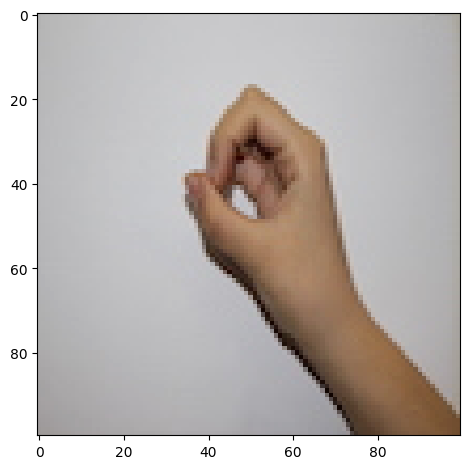

In [9]:
io.imshow(Dataset[0])

### Image After GrayScale 

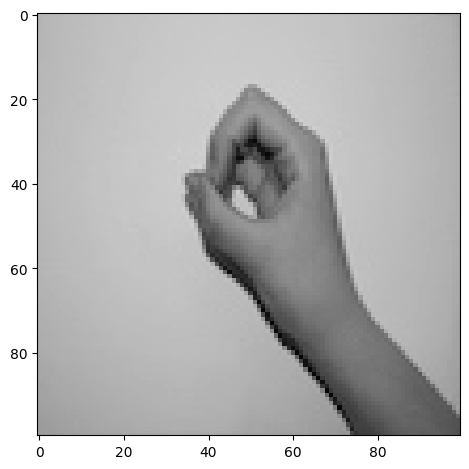

In [10]:
io.imshow(GreyDataset[0])

# Splitting and Shuffling Dataset

In [11]:
#Shuffle Dataset and split
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(GreyDataset, Y, test_size=0.2, random_state=1,shuffle=True)

# Report Cross Validation, Precision, Recall and F1 Score

In [12]:
# evaluate a model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    sum_ = 0.0
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        # fit model
        
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(valX, valY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(valX, valY, verbose=0)
        # stores scores
        scores.append(acc)
        histories.append(history)
        sum_ += acc
    score = sum_ / n_folds
    return score


In [13]:
def applyModel(model,scoreOfVal):
    #print('Finish prep')
    #print('finish eva val')
    # Final evaluation of the model
    _, scoreOfTest = model.evaluate(x_Test, y_Test, batch_size=32, verbose=0)
    #print('finish eva test')
    print('accuracy for Validation = ', scoreOfVal)
    print('accuracy for Testing = ', scoreOfTest)

    #predict_x=model.predict(x_Test) 
    #classes_x=np.argmax(predict_x,axis=1)
    
    ypred=model.predict(x_Test)
    ypred=np.argmax(ypred,axis=1)

    print(classification_report(y_Test, ypred))


### Shapes

In [14]:

print(x_Train.shape)
print(y_Train.shape)
print(x_Test.shape)
print(y_Test.shape)

(1649, 100, 100)
(1649,)
(413, 100, 100)
(413,)


# RUN NN MODELS

### MODEL#1

In [15]:
def model_Architecture_1():
    model = Sequential();
    
    model.add(Flatten(input_shape=(100,100)))
    
    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.1))
    
    model.add(Dense(128,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    model.compile(Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    
    return model
model_Architecture_1=model_Architecture_1()
#model.summary()

### MODEL#2

In [16]:
def model_Architecture_2():
    model = Sequential();
    
    model.add(Flatten(input_shape=(100,100)))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10,activation="softmax"))
    
    model.compile(Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    
    return model
model_Architecture_2=model_Architecture_2()
#model.summary()

# Evaluation of Best MODEL

In [17]:
scoreOfVal_Architecture_1= evaluate_model(model_Architecture_1, x_Train, y_Train)
scoreOfVal_Architecture_2= evaluate_model(model_Architecture_2, x_Train, y_Train)

flag=True # will be used for PREDICTIONS  (ARCH1 is the best)

if scoreOfVal_Architecture_1 > scoreOfVal_Architecture_2: # Arch_1 is better than Arch_2 
    x = model_Architecture_1.fit(x_Train,y_Train,epochs=100,batch_size=128,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,validation_data=(x_Test, y_Test))
    print ("Architecture 1 is the Best")
else: # Arch_2 is better than Arch_1
    x = model_Architecture_2.fit(x_Train,y_Train,epochs=100,batch_size=128,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,validation_data=(x_Test, y_Test))
    flag=False
    print ("Architecture 2 is the Best")

Epoch 1/100
13/13 [==============================] - 1s 52ms/step - loss: 0.5818 - accuracy: 0.8308 - val_loss: 0.8143 - val_accuracy: 0.7337
Epoch 2/100
13/13 [==============================] - 1s 45ms/step - loss: 0.5450 - accuracy: 0.8496 - val_loss: 0.7824 - val_accuracy: 0.7506
Epoch 3/100
13/13 [==============================] - 1s 45ms/step - loss: 0.5358 - accuracy: 0.8581 - val_loss: 0.7930 - val_accuracy: 0.7506
Epoch 4/100
13/13 [==============================] - 1s 44ms/step - loss: 0.5407 - accuracy: 0.8448 - val_loss: 0.7802 - val_accuracy: 0.7554
Epoch 5/100
13/13 [==============================] - 1s 43ms/step - loss: 0.5362 - accuracy: 0.8605 - val_loss: 0.8089 - val_accuracy: 0.7458
Epoch 6/100
13/13 [==============================] - 1s 43ms/step - loss: 0.5296 - accuracy: 0.8581 - val_loss: 0.7774 - val_accuracy: 0.7603
Epoch 7/100
13/13 [==============================] - 1s 44ms/step - loss: 0.5213 - accuracy: 0.8496 - val_loss: 0.7824 - val_accuracy: 0.7603
Epoch 

13/13 [==============================] - 1s 46ms/step - loss: 0.4031 - accuracy: 0.8848 - val_loss: 0.7268 - val_accuracy: 0.7772
Epoch 59/100
13/13 [==============================] - 1s 50ms/step - loss: 0.3967 - accuracy: 0.8896 - val_loss: 0.7186 - val_accuracy: 0.7700
Epoch 60/100
13/13 [==============================] - 1s 42ms/step - loss: 0.3991 - accuracy: 0.8872 - val_loss: 0.7119 - val_accuracy: 0.7772
Epoch 61/100
13/13 [==============================] - 1s 47ms/step - loss: 0.3918 - accuracy: 0.8860 - val_loss: 0.7059 - val_accuracy: 0.7821
Epoch 62/100
13/13 [==============================] - 1s 45ms/step - loss: 0.3883 - accuracy: 0.8957 - val_loss: 0.7167 - val_accuracy: 0.7700
Epoch 63/100
13/13 [==============================] - 1s 47ms/step - loss: 0.3921 - accuracy: 0.8884 - val_loss: 0.7263 - val_accuracy: 0.7700
Epoch 64/100
13/13 [==============================] - 1s 47ms/step - loss: 0.3847 - accuracy: 0.8902 - val_loss: 0.7279 - val_accuracy: 0.7700
Epoch 65/100

In [18]:
if flag:
    ypred=model_Architecture_1.predict(x_Test)
else:
    ypred=model_Architecture_2.predict(x_Test)

13/13 [==============================] - 1s 4ms/step


### ACCURACY FOR BEST MODEL 

In [19]:
if flag:
    scores = model_Architecture_1.evaluate(x_Test, y_Test, verbose=0)
else:
    scores = model_Architecture_2.evaluate(x_Test, y_Test, verbose=0)
print("Accuracy: %.0f%%" % (scores[1]*100))

Accuracy: 77%


### PRECISION,RECALL and F1 SCORE

In [20]:
if flag:
    applyModel(model_Architecture_1,scoreOfVal_Architecture_1)
else:
    applyModel(model_Architecture_2,scoreOfVal_Architecture_2)

accuracy for Validation =  0.694434928894043
accuracy for Testing =  0.7651331424713135
13/13 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.83      0.89      0.86        44
           2       0.65      0.82      0.73        40
           3       0.84      0.88      0.86        42
           4       0.71      0.60      0.65        42
           5       0.91      0.73      0.81        44
           6       0.61      0.68      0.64        37
           7       0.85      0.55      0.67        42
           8       0.66      0.74      0.70        47
           9       0.78      0.89      0.83        35

    accuracy                           0.77       413
   macro avg       0.77      0.77      0.76       413
weighted avg       0.78      0.77      0.76       413



### Summary for Best Model

In [21]:
if flag:
    model_Architecture_1.summary()
else:
    model_Architecture_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               2560256   
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,610,954
Trainable params: 2,610,954
Non-trainable params: 0
_________________________________________________________________


### Training and Validation ACCURACY, LOSS PLOT

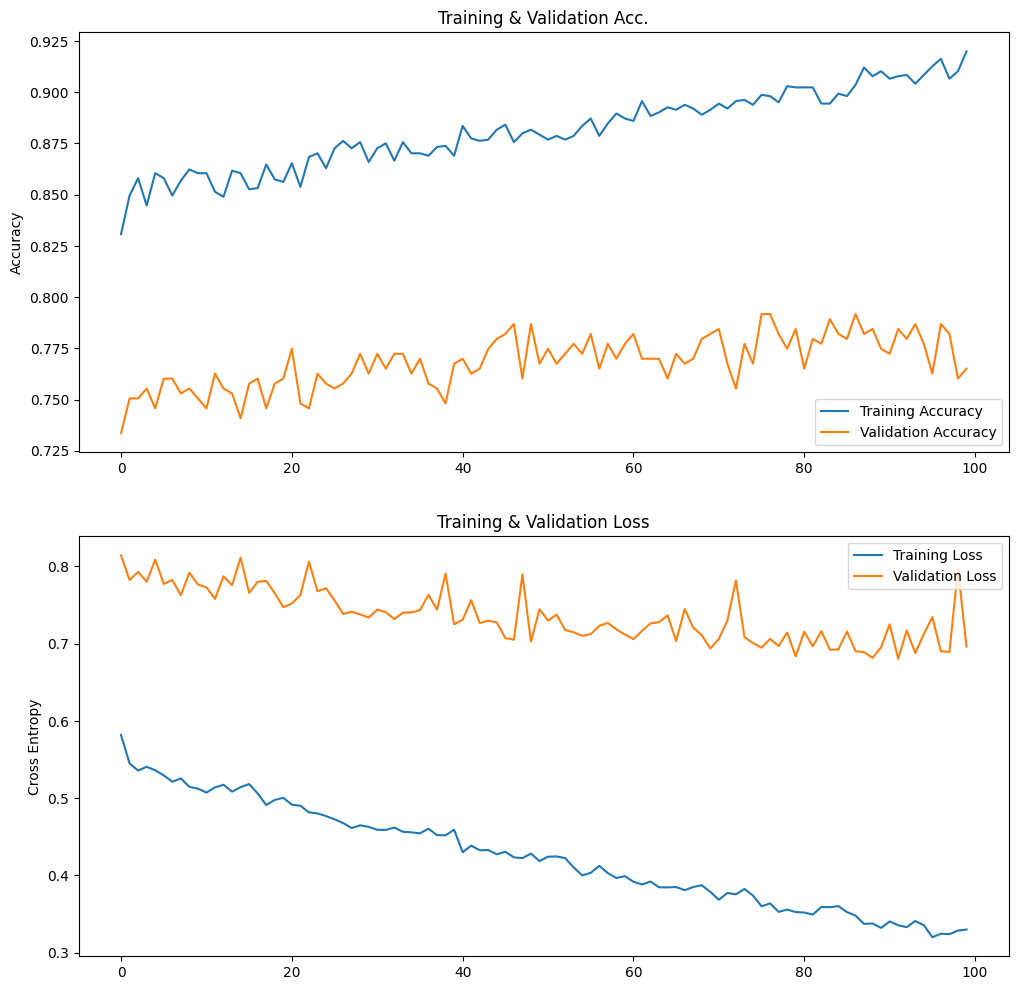

In [22]:
acc = x.history['accuracy']
val_acc = x.history['val_accuracy'] 
 
loss = x.history['loss'] 
val_loss = x.history['val_loss'] 
 
 
plt.figure(figsize=(12, 12)) 
 
plt.subplot(2, 1, 1) 
plt.plot(acc, label='Training Accuracy') 
plt.plot(val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.ylabel('Accuracy') 
plt.title('Training & Validation Acc.') 
 
 
plt.subplot(2, 1, 2) 
plt.plot(loss, label='Training Loss') 
plt.plot(val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.ylabel('Cross Entropy') 
plt.title('Training & Validation Loss') 

plt.show()